In [3]:
import numpy as np  # Linear algebra
import pandas as pd # data processing

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno # For vizualizing missing data
%matplotlib inline

plt.rc('figure',figsize=(12,4)) # Set the size of each plot

In [5]:
# !pip install missingno

In [7]:
fuel_df = pd.read_csv('fuel_ferc1.csv')

In [9]:
print('The dataset contains {} rows and {} columns'.format(fuel_df.shape[0],fuel_df.shape[1]))

The dataset contains (29523, 11) rows and 11 columns


In [25]:
fuel_df['fuel_unit'].value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [35]:
fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [28]:
fuel_df['fuel_unit'].nunique()

9

In [29]:
fuel_df.sample(10)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
18106,f1_fuel_2008_12_41_2_10,41,2008,campbell 3 (ceco),coal,ton,3159525.0,17.942776,34.946,35.436,1.9480
1615,f1_fuel_1995_12_36_0_10,36,1995,hudson ave.,gas,mcf,64.0,1.000000,787.500,0.000,9.8718
24307,f1_fuel_2014_12_186_1_1,186,2014,clover,oil,bbl,2407.0,5.702214,115.370,121.770,19.6200
9113,f1_fuel_2001_12_134_0_1,134,2001,carbon,coal,ton,623905.0,24.452000,14.768,14.373,0.6040
189,f1_fuel_1994_12_46_0_7,46,1994,sammis 7,coal,ton,500090.0,24.176000,31.949,30.453,1.3220
11482,f1_fuel_2003_12_157_0_7,157,2003,"valmy 1, 2",coal,ton,782564.0,10.935000,36.164,32.463,3.3070
16318,f1_fuel_2007_12_170_0_12,170,2007,bayside,gas,mcf,54248716.0,0.994364,9.837,9.830,9.5360
24193,f1_fuel_2013_12_99_0_14,99,2013,greene county,coal,ton,431735.0,23.000000,90.501,0.000,3.9590
12282,f1_fuel_2004_12_79_1_4,79,2004,iatan 70%,coal,ton,2064706.0,17.130000,11.919,11.929,0.6960
25193,f1_fuel_2014_12_22_1_7,22,2014,teche 4,gas,mcf,119404.0,1.017906,5.009,5.009,4.9210


In [113]:
categorical_features = fuel_df.select_dtypes(include='object')
numerical_features = fuel_df.select_dtypes(include='number')

In [40]:
num = fuel_df.select_dtypes(include='number')
num

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1,1994,5377489.0,16.590,18.59,18.53,1.121
1,1,1994,10486945.0,16.592,18.58,18.53,1.120
2,2,1994,2978683.0,24.130,39.72,38.12,1.650
3,2,1994,3739484.0,23.950,47.21,45.99,1.970
4,2,1994,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...
29518,12,2018,18799.0,1.059,4.78,4.78,9.030
29519,12,2018,806730.0,1.050,3.65,3.65,6.950
29520,12,2018,104554.0,1.060,4.77,4.77,8.990
29521,12,2018,315945.0,16.108,3.06,14.76,1.110


In [41]:
cate = fuel_df.select_dtypes(include='object')
cate

,record_id,plant_name_ferc1,fuel_type_code_pudl,fuel_unit
0,f1_fuel_1994_12_1_0_7,rockport,coal,ton
1,f1_fuel_1994_12_1_0_10,rockport total plant,coal,ton
2,f1_fuel_1994_12_2_0_1,gorgas,coal,ton
3,f1_fuel_1994_12_2_0_7,barry,coal,ton
4,f1_fuel_1994_12_2_0_10,chickasaw,gas,mcf
...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,neil simpson ct #1,gas,mcf
29519,f1_fuel_2018_12_12_1_1,cheyenne prairie 58%,gas,mcf
29520,f1_fuel_2018_12_12_1_10,lange ct facility,gas,mcf
29521,f1_fuel_2018_12_12_1_13,wygen 3 bhp 52%,coal,ton


In [43]:
cate.isna().sum()

record_id                0
plant_name_ferc1         0
fuel_type_code_pudl      0
fuel_unit              180
dtype: int64

In [8]:
b = (180/29523)*100

In [9]:
round(b,2)

0

In [6]:
29523-180

29343

In [11]:
c=(29343/29523)*100

In [12]:
b+c

99.39030586322528

In [61]:
gg = fuel_df.describe(include='all')
gg

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_1994_12_150_1_12,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [91]:
hh = fuel_df.describe().round(2)
hh

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.00,29523.00,2.952300e+04,29523.00,29523.00,29523.00,29523.00
mean,118.60,2005.81,2.622119e+06,8.49,208.65,917.57,19.30
std,74.18,7.03,9.118004e+06,10.60,2854.49,68775.93,2091.54
min,1.00,1994.00,1.000000e+00,0.00,-276.08,-874.94,-41.50
25%,55.00,2000.00,1.381700e+04,1.02,5.21,3.78,1.94
50%,122.00,2006.00,2.533220e+05,5.76,26.00,17.37,4.13
75%,176.00,2012.00,1.424034e+06,17.01,47.11,42.14,7.74
max,514.00,2018.00,5.558942e+08,341.26,139358.00,7964521.00,359278.00


In [112]:
# Question number 5

In [95]:
print(fuel_df.fuel_qty_burned.skew().round(2))
print(fuel_df.fuel_qty_burned.kurtosis().round(2))

15.85
651.37


In [60]:
if gg is hh:
    print(True)
else:
    print("They aren't equal")

They aren't equal


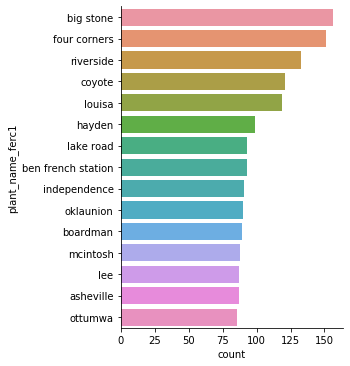

In [63]:
sns.catplot(y='plant_name_ferc1', data = fuel_df,kind='count', 
            order=fuel_df.plant_name_ferc1.value_counts().nlargest(15).index)

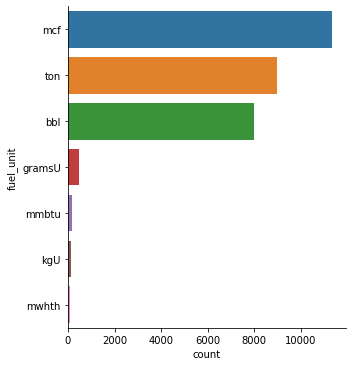

In [65]:
sns.catplot(y='fuel_unit', data = fuel_df,kind='count', 
            order=fuel_df.fuel_unit.value_counts().nlargest(7).index)

In [67]:
fuel_df[fuel_df.fuel_cost_per_mmbtu > 349999]["fuel_cost_per_mmbtu"]

28256    359278.0
Name: fuel_cost_per_mmbtu, dtype: float64

In [69]:
fuel_df.skew().round(2)

utility_id_ferc1                  0.61
report_year                       0.01
fuel_qty_burned                  15.85
fuel_mmbtu_per_unit               4.14
fuel_cost_per_unit_burned        19.79
fuel_cost_per_unit_delivered    105.01
fuel_cost_per_mmbtu             171.68
dtype: float64

In [70]:
fuel_df.kurtosis().round(2)

utility_id_ferc1                    1.09
report_year                        -1.15
fuel_qty_burned                   651.37
fuel_mmbtu_per_unit                55.60
fuel_cost_per_unit_burned         485.26
fuel_cost_per_unit_delivered    11765.05
fuel_cost_per_mmbtu             29489.13
dtype: float64

In [76]:
round(fuel_df.fuel_mmbtu_per_unit.std(), 2)

10.6

In [83]:
fuel_df["fuel_unit"].isnull().value_counts()

False    29343
True       180
Name: fuel_unit, dtype: int64

In [87]:
fuel_df.select_dtypes(include='object').isnull()

,record_id,plant_name_ferc1,fuel_type_code_pudl,fuel_unit
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
29518,False,False,False,False
29519,False,False,False,False
29520,False,False,False,False
29521,False,False,False,False


In [ ]:
# Question number 4

In [111]:
fuel_df.describe().round(2)

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.00,29523.00,2.952300e+04,29523.00,29523.00,29523.00,29523.00
mean,118.60,2005.81,2.622119e+06,8.49,208.65,917.57,19.30
std,74.18,7.03,9.118004e+06,10.60,2854.49,68775.93,2091.54
min,1.00,1994.00,1.000000e+00,0.00,-276.08,-874.94,-41.50
25%,55.00,2000.00,1.381700e+04,1.02,5.21,3.78,1.94
50%,122.00,2006.00,2.533220e+05,5.76,26.00,17.37,4.13
75%,176.00,2012.00,1.424034e+06,17.01,47.11,42.14,7.74
max,514.00,2018.00,5.558942e+08,341.26,139358.00,7964521.00,359278.00


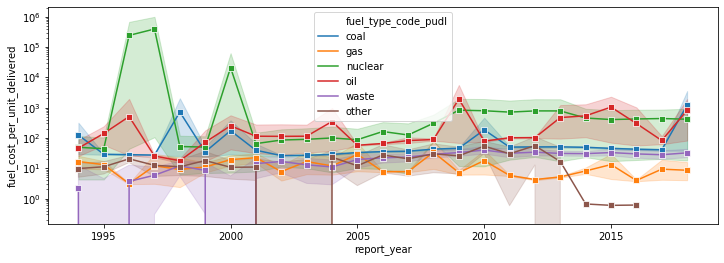

In [96]:
l_plot = sns.lineplot(data=fuel_df,x='report_year',y='fuel_cost_per_unit_delivered',
             hue='fuel_type_code_pudl', marker='s')
l_plot.set_yscale('log')

In [ ]:
import numpy as np

In [108]:
# question number 2

In [97]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
# guestion number 3 and 10

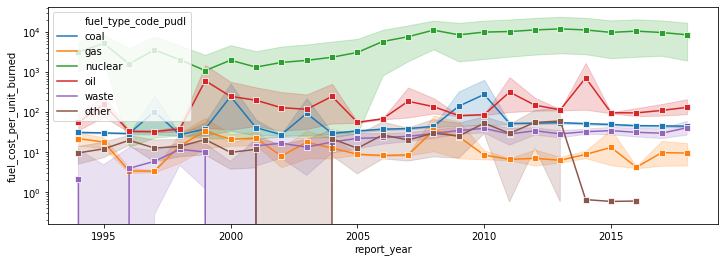

In [110]:
l_plot = sns.lineplot(data=fuel_df,x='report_year',y='fuel_cost_per_unit_burned',
             hue='fuel_type_code_pudl', marker='s')
l_plot.set_yscale('log')

In [107]:
#  Question number 1

In [104]:
a= [1,2,3,4,5,6]
B = [13, 21, 34]
a.extend(B)
# a.append(B)

In [102]:
a.extend(B)

In [105]:
a

[1, 2, 3, 4, 5, 6, 13, 21, 34]